# IRIS flower prediction

* Name - Rajat Subhra Saha

## Introduction
* The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

## Problem Statement

* Use the Iris dataset to develop a model that can classify iris flowers into different species based on their sepal and petal measurements. This dataset is widely used for introductory classification tasks.

## Source of Dataset

* We collected the dataset from Kaggle.com

## Size of Dataset

* Size of IRIS dataset is 4.62 kB

## Libraries Used
* Numpy
* Pandas
* Matplotlib
* Seaborn
* Sklearn

## About the Dataset
* The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).

# Data Preprocessing

## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
107,7.3,2.9,6.3,1.8,Iris-virginica
118,7.7,2.6,6.9,2.3,Iris-virginica
63,6.1,2.9,4.7,1.4,Iris-versicolor


In [8]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## Type of each feature in dataset

In [9]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

## Checking Missing values

In [10]:
(df.isnull().sum()/len(df))*100

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64

## Checking duplicate values

In [11]:
df.duplicated().sum()

3

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

## Exploratory Data Analysis

In [14]:
df.groupby('species')['sepal_width'].value_counts()

species          sepal_width
Iris-setosa      3.4             9
                 3.5             6
                 3.0             6
                 3.2             5
                 3.8             4
                 3.7             3
                 3.1             3
                 3.9             2
                 3.6             2
                 3.3             2
                 2.9             1
                 4.4             1
                 4.2             1
                 4.1             1
                 4.0             1
                 2.3             1
Iris-versicolor  3.0             8
                 2.9             7
                 2.8             6
                 2.7             5
                 2.5             4
                 2.3             3
                 2.4             3
                 2.6             3
                 3.2             3
                 3.1             3
                 2.2             2
                 3.3      

<Axes: xlabel='species', ylabel='sepal_width'>

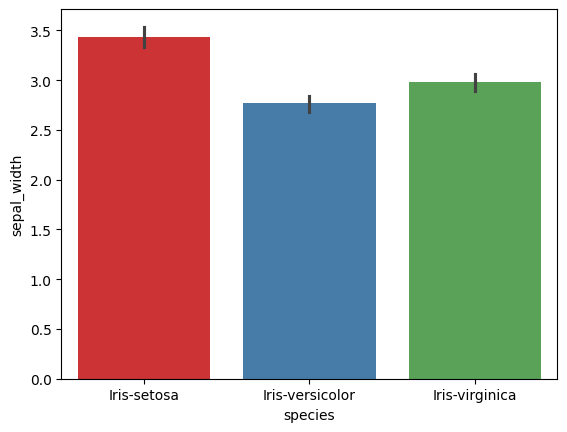

In [15]:
sns.barplot(x='species',y='sepal_width',data=df,palette='Set1')

In [16]:
df.groupby('species')['sepal_length'].value_counts()

species          sepal_length
Iris-setosa      5.0             8
                 5.1             8
                 5.4             5
                 4.8             5
                 4.6             4
                 4.4             3
                 5.2             3
                 4.7             2
                 4.9             2
                 5.5             2
                 5.7             2
                 4.3             1
                 5.8             1
                 5.3             1
                 4.5             1
Iris-versicolor  5.5             5
                 5.7             5
                 5.6             5
                 6.1             4
                 6.0             4
                 6.7             3
                 5.8             3
                 6.3             3
                 6.6             2
                 6.4             2
                 6.2             2
                 5.9             2
                 5.0     

In [17]:
df.groupby('species')['petal_length'].value_counts()

species          petal_length
Iris-setosa      1.4             12
                 1.5             12
                 1.3              7
                 1.6              7
                 1.7              4
                 1.9              2
                 1.2              2
                 1.0              1
                 1.1              1
Iris-versicolor  4.5              7
                 4.0              5
                 4.7              5
                 4.4              4
                 4.2              4
                 4.6              3
                 4.1              3
                 3.9              3
                 4.8              2
                 4.9              2
                 3.5              2
                 3.3              2
                 4.3              2
                 5.1              1
                 5.0              1
                 3.8              1
                 3.7              1
                 3.6              

In [18]:
df.groupby('species')['petal_width'].value_counts()

species          petal_width
Iris-setosa      0.2            28
                 0.3             7
                 0.4             7
                 0.1             4
                 0.6             1
                 0.5             1
Iris-versicolor  1.3            13
                 1.5            10
                 1.0             7
                 1.4             7
                 1.2             5
                 1.6             3
                 1.1             3
                 1.8             1
                 1.7             1
Iris-virginica   1.8            11
                 2.3             8
                 2.1             6
                 2.0             6
                 1.9             4
                 2.4             3
                 2.2             3
                 2.5             3
                 1.5             2
                 1.6             1
                 1.7             1
                 1.4             1
Name: count, dtype: int64

<Axes: xlabel='species', ylabel='count'>

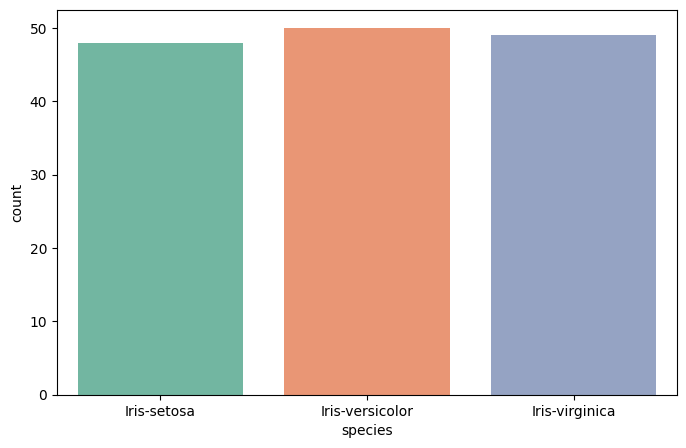

In [19]:
plt.figure(figsize=(8,5))    
sns.countplot(x='species',data=df,palette='Set2')

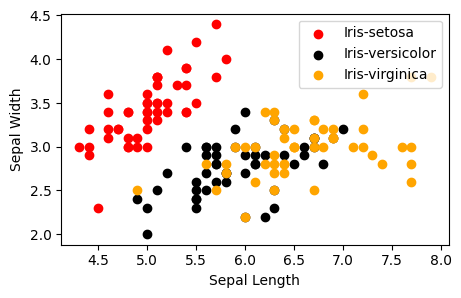

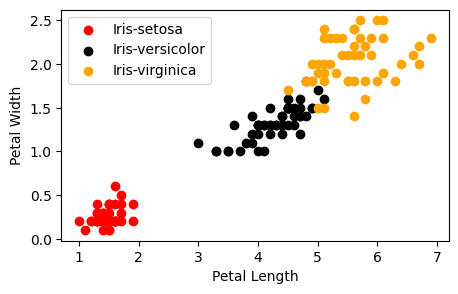

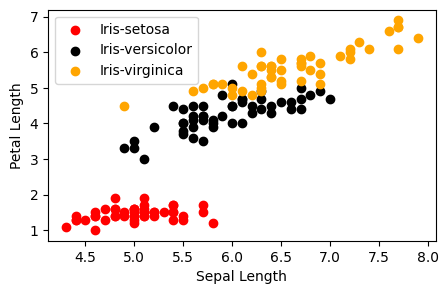

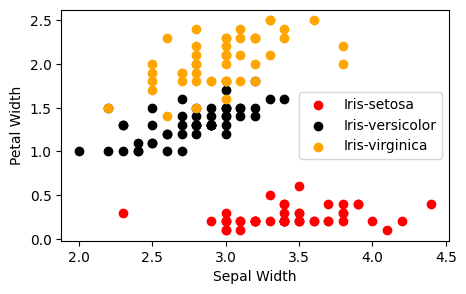

In [20]:
colors=['red','Black','orange']
species=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
plt.figure(figsize=(5,3)) 
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

plt.figure(figsize=(5,3)) 
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

plt.figure(figsize=(5,3)) 
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

plt.figure(figsize=(5,3)) 
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

<Axes: >

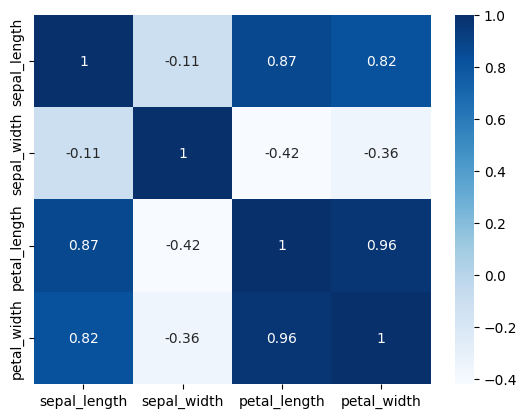

In [21]:
sns.heatmap(df[['sepal_length','sepal_width','petal_length','petal_width']].corr(), annot=True,cmap="Blues")

In [22]:
le=LabelEncoder()

In [23]:
df['species']=le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
x=df.drop(columns='species')
y=df['species']

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [26]:
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [27]:
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [28]:
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [29]:
y_pred = log.predict(x_test)
y_pred

array([2, 0, 2, 2, 0, 1, 2, 2, 0, 2, 2, 1, 0, 2, 0, 2, 2, 1, 2, 1, 0, 1,
       2, 1, 0, 2, 0, 0, 1, 1])

In [30]:
y_test

114    2
15     0
112    2
120    2
11     0
138    2
127    2
124    2
48     0
134    2
111    2
78     1
28     0
118    2
32     0
131    2
149    2
71     1
103    2
56     1
26     0
92     1
146    2
53     1
16     0
116    2
29     0
39     0
64     1
87     1
Name: species, dtype: int32

In [31]:
log_accuracy=log.score(x_test,y_test)*100
KNN_accuracy=KNN.score(x_test,y_test)*100
DT_accuracy=DT.score(x_test,y_test)*100

print(f"Accuracy by using Logistic Regression: {log_accuracy}%")
print()
print(f"Accuracy by using K Nearest Neighbors Algorithm: {KNN_accuracy}%")
print()
print(f"Accuracy by using Decision Tree Classifier: {DT_accuracy}%")
print()

Accuracy by using Logistic Regression: 96.66666666666667%

Accuracy by using K Nearest Neighbors Algorithm: 96.66666666666667%

Accuracy by using Decision Tree Classifier: 100.0%

